# Graph Environment Experiments (2)

In [1]:
from neuronav.envs.graph_env import GraphEnv, GraphObsType
from neuronav.envs.graph_structures import GraphStructure
from neuronav.agents.td_agents import TDSR
from neuronav.agents.dyna_agents import DynaSR
from neuronav.agents.mb_agents import MBV, SRMB
from neuronav.utils import run_episode

import numpy as np
from helpers import plot_graph_experiment_results, get_scores, AgentParams, init_agents, calc_revaluation

### Set parameters for experiment

In [2]:
num_eps = 100
num_steps = 2
num_reps = 10

agent_dict = {"TDSR": TDSR, "DynaSR": DynaSR, "SRMB": SRMB, "MBV": MBV}

agent_params = AgentParams(
    poltype = "softmax",
    beta = 1e-4,
    epsilon = 0.1,
    learning_rate = 1e-1,
    gamma = 0.9,
)

### Define experiment-specific functions

In [3]:
def gen_init_prefs(env, agents, num_eps, num_steps):
    init_state_prefs = []
    for agent in agents:
        for i in range(num_eps):
            agent, _ = run_episode(env, agent, num_steps, 0)
        Qs = agent.Q[:, 0]
        max_Q_idx = np.argmax(Qs)
        init_state_prefs.append((agent.__class__.__name__, max_Q_idx, Qs))
    return init_state_prefs

def control_func(agent_types):
    env = GraphEnv(GraphStructure.human_b, obs_type=GraphObsType.index)
    agents = init_agents(env, agent_types, agent_params)
    env.reset()
    env.render()
    init_state_prefs = gen_init_prefs(env, agents, num_eps, num_steps)
    control_state_prefs = gen_init_prefs(env, agents, num_eps, num_steps)
    return calc_revaluation(init_state_prefs, control_state_prefs)

def reward_func(agent_types):
    env = GraphEnv(GraphStructure.human_b, obs_type=GraphObsType.index)
    agents = init_agents(env, agent_types, agent_params)
    init_state_prefs = gen_init_prefs(env, agents, num_eps, num_steps)

    env.reward_nodes[3] = 45
    env.reward_nodes[4] = 0
    env.reward_nodes[5] = 30

    env.reset()
    env.render()

    rew_state_prefs = []
    for agent in agents:
        for i in range(num_eps):
            start_state = np.random.randint(3, 6)
            agent, _ = run_episode(env, agent, num_steps, start_state)
        Qs = agent.Q[:, 0]
        max_Q_idx = np.argmax(Qs)
        rew_state_prefs.append((agent.__class__.__name__, max_Q_idx, Qs))

    return calc_revaluation(init_state_prefs, rew_state_prefs)

def transition_func(agent_types):
    env = GraphEnv(GraphStructure.human_b, obs_type=GraphObsType.index)
    agents = init_agents(env, agent_types, agent_params)
    init_state_prefs = gen_init_prefs(env, agents, num_eps, num_steps)

    env.edges[1] = [4, 5]
    env.edges[2] = [3, 4]

    env.reset()
    env.render()

    trans_state_prefs = []
    for agent in agents:
        for i in range(num_eps):
            start_state = np.random.randint(1, 3)
            agent, _ = run_episode(env, agent, num_steps, start_state)
        Qs = agent.Q[:, 0]
        max_Q_idx = np.argmax(Qs)
        trans_state_prefs.append((agent.__class__.__name__, max_Q_idx, Qs))

    return calc_revaluation(init_state_prefs, trans_state_prefs)

def policy_func(agent_types):
    env = GraphEnv(GraphStructure.human_b, obs_type=GraphObsType.index)
    env.reward_nodes[3] = 0
    env.reward_nodes[4] = 15
    env.reward_nodes[5] = 30

    agents = init_agents(env, agent_types, agent_params)
    init_state_prefs = gen_init_prefs(env, agents, num_eps, num_steps)

    env.reward_nodes[3] = 45
    env.reward_nodes[4] = 15
    env.reward_nodes[5] = 30

    env.reset()
    env.render()

    policy_state_prefs = []
    for agent in agents:
        for i in range(num_eps):
            start_state = np.random.randint(3, 6)
            agent, _ = run_episode(env, agent, num_steps, start_state)
        Qs = agent.Q[:, 0]
        max_Q_idx = np.argmax(Qs)
        policy_state_prefs.append((agent.__class__.__name__, max_Q_idx, Qs))
    return calc_revaluation(init_state_prefs, policy_state_prefs)

### Run experimental conditions

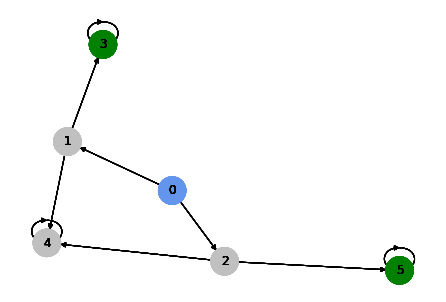

In [4]:
all_cs = get_scores(control_func, agent_dict, num_reps)

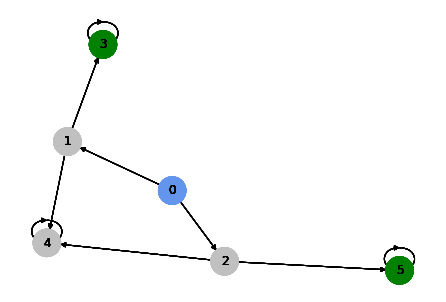

In [5]:
all_rs = get_scores(reward_func, agent_dict, num_reps)

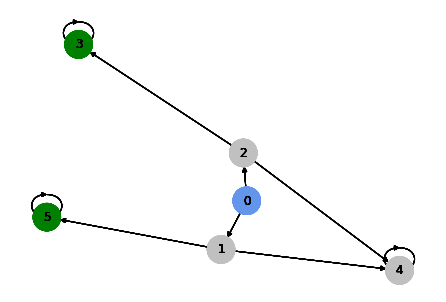

In [6]:
all_ts = get_scores(transition_func, agent_dict, num_reps)

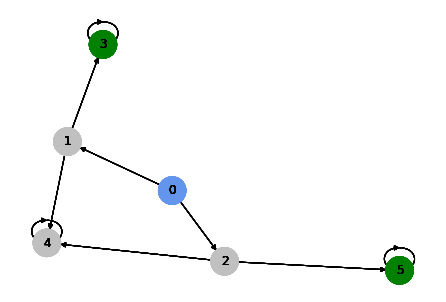

In [7]:
all_ps = get_scores(policy_func, agent_dict, num_reps)

### Plot results

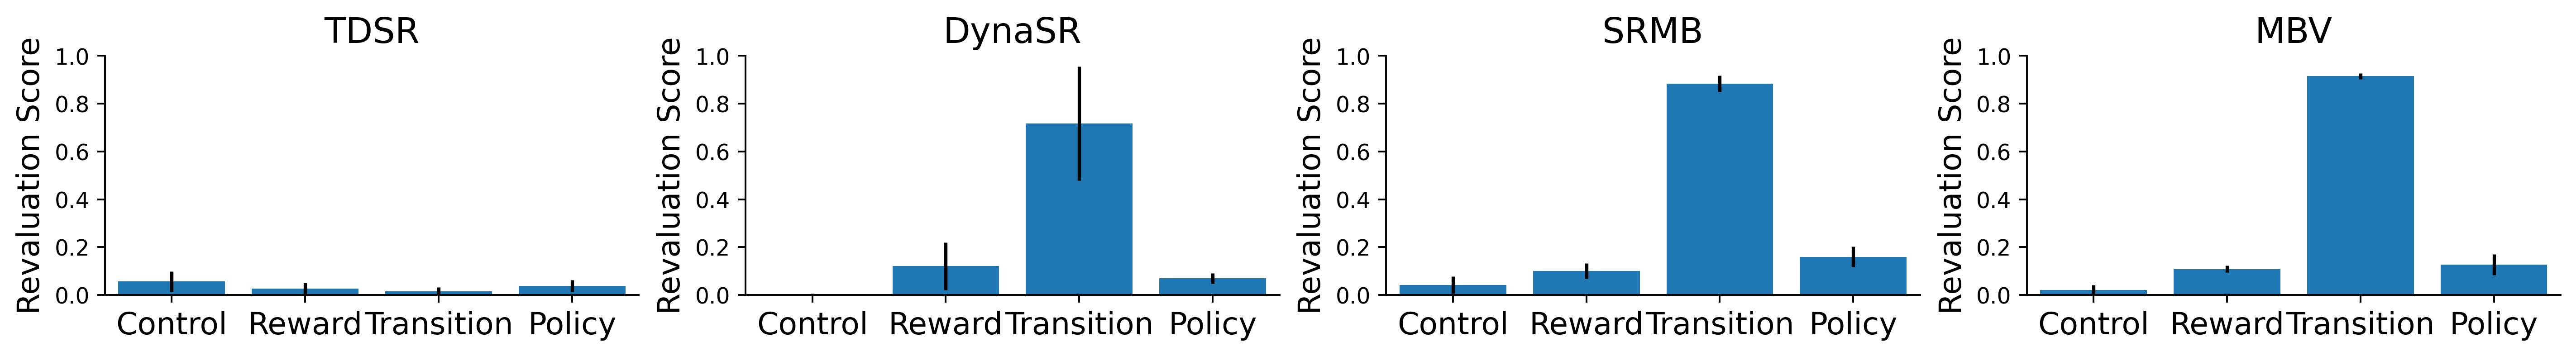

In [8]:
result_dict = {"Control": all_cs, "Reward": all_rs, "Transition": all_ts, "Policy": all_ps}
plot_graph_experiment_results(list(agent_dict.keys()), result_dict, "experiment_2")